# OSM API

https://wiki.openstreetmap.org/wiki/Osmapi

https://github.com/metaodi/osmapi

In [2]:
import osmapi as osm
from PIL import Image
import requests
from io import BytesIO

https://www.openstreetmap.org/query?lat=47.3777&lon=8.5396

In [6]:
api = osm.OsmApi() # this instantiate the OsmApi class - do you need to authorise?
node = api.NodeGet('...')

In [ ]:
# Can you get also ways and relations?

In [5]:
# Visualization of attributes
response = requests.get(node['tag']['image'])
img = Image.open(BytesIO(response.content))

NameError: name 'node' is not defined

# OSMPythonTools

https://github.com/mocnik-science/osm-python-tools

## Example 1

_Which object does the way with the id 5887599 represent?_

In [8]:
from OSMPythonTools.api import Api
api = Api()
way = api.query('way/5887599')

[api] downloading data: way/5887599


In [9]:
way.tag('building')
way.tag('architect')
way.tag('website')

'https://www.belvedere.at/'

## Example 2

_What is the English name of the church called ‘Stephansdom’, what address does it have, and which of which denomination is the church?_

In [10]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()
result = overpass.query('way["name"="Stephansdom"]; out body;')

[overpass] downloading data: [timeout:25][out:json];way["name"="Stephansdom"]; out body;


In [11]:
stephansdom = result.elements()[0]

In [12]:
stephansdom.tag('name:en')
'%s %s, %s %s' % (stephansdom.tag('addr:street'), stephansdom.tag('addr:housenumber'), stephansdom.tag('addr:postcode'), stephansdom.tag('addr:city'))
stephansdom.tag('building')
stephansdom.tag('denomination')

'roman_catholic'

## Example 3

_How many trees are in the OSM data of Vienna? And how many trees have there been in 2013?_

In [13]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

[nominatim] downloading data: Vienna, Austria


In [14]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
result = overpass.query(query)
result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3600109166)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;


141650

In [15]:
result = overpass.query(query, date='2013-01-01T00:00:00Z', timeout=60)
result.countElements()

[overpass] downloading data: [timeout:60][date:"2013-01-01T00:00:00Z"][out:json];area(3600109166)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;


127690

## Example 4

_Where are waterbodies located in Vienna?_

In [16]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

In [17]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType=['way', 'relation'], selector='"natural"="water"', includeGeometry=True)
result = overpass.query(query)

[overpass] downloading data: [timeout:25][date:"2013-01-01T00:00:00Z"][out:json];area(3600109166)->.searchArea;(way["natural"="water"](area.searchArea);relation["natural"="water"](area.searchArea);); out body geom;
[overpass] waiting for 10.0 seconds
[overpass] waiting for 10.0 more seconds
[overpass] waiting for 10.0 more seconds
[overpass] start processing
Exception: [overpass] runtime error: Query timed out in "query" at line 1 after 54 seconds.


Exception: [overpass] error in result (cache/overpass-9dc297c5a20c19a14697771e44109695566d12f3): [timeout:25][date:"2013-01-01T00:00:00Z"][out:json];area(3600109166)->.searchArea;(way["natural"="water"](area.searchArea);relation["natural"="water"](area.searchArea);); out body geom;

In [18]:
firstElement = result.elements()[0]
firstElement.geometry()

TypeError: 'NoneType' object is not subscriptable

## Example 5

_How did the number of trees in Berlin, Paris, and Vienna change over time?_

In [19]:
from collections import OrderedDict
from OSMPythonTools.data import Data, dictRangeYears, ALL
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

In [20]:
dimensions = OrderedDict([
    ('year', dictRangeYears(2013, 2017.5, 1)),
    ('city', OrderedDict({
        'berlin': 'Berlin, Germany',
        'paris': 'Paris, France',
        'vienna': 'Vienna, Austria',
    })),
])

In [21]:
overpass = Overpass()
def fetch(year, city):
    areaId = nominatim.query(city).areaId()
    query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
    return overpass.query(query, date=year, timeout=120).countElements()
data = Data(fetch, dimensions)

[nominatim] downloading data: Berlin, Germany
[overpass] downloading data: [timeout:120][date:"2013-01-01T00:00:00Z"][out:json];area(3600062422)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;
[overpass] waiting for 10.0 seconds
[overpass] waiting for 10.0 more seconds
[overpass] waiting for 10.0 more seconds
[overpass] waiting for 8.0 more seconds
[overpass] start processing
[nominatim] downloading data: Paris, France
[overpass] downloading data: [timeout:120][date:"2013-01-01T00:00:00Z"][out:json];area(3600007444)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;
[overpass] waiting for 10.0 seconds
[overpass] waiting for 10.0 more seconds
[overpass] waiting for 7.0 more seconds
[overpass] start processing
[overpass] downloading data: [timeout:120][date:"2014-01-01T00:00:00Z"][out:json];area(3600062422)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;
[overpass] downloading data: [timeout:120][date:"2014-01-01T00:00:00Z"][out:js


                value
city   year          
berlin 2013.0   10180
       2014.0   17971
       2015.0   28277
       2016.0   86769
       2017.0  108432
paris  2013.0    1936
       2014.0   26905
       2015.0   90602
       2016.0  103175
       2017.0  103249
vienna 2013.0  127690
       2014.0  128906
       2015.0  130279
       2016.0  132294
       2017.0  134617

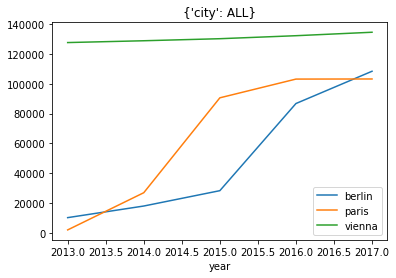

In [22]:
data.plot(city=ALL, filename='example4.png')

In [23]:
data.select(city=ALL).getCSV()

'year,berlin,paris,vienna\r\n2013.0,10180,1936,127690\r\n2014.0,17971,26905,128906\r\n2015.0,28277,90602,130279\r\n2016.0,86769,103175,132294\r\n2017.0,108432,103249,134617\r\n'

# One more example with Overpass_API

https://wiki.openstreetmap.org/wiki/Overpass_API

https://medium.com/better-programming/how-to-get-open-street-and-map-data-using-python-2b777bf5af14

`node["amenity"="cafe"]({{bbox}}); out;`

`node["amenity"="pub"](53.2987342,-6.3870259,53.4105416,-6.1148829); out;
`

`( node["amenity"="cafe"]({{bbox}});
  way["amenity"="cafe"]({{bbox}});
  relation["amenity"="cafe"]({{bbox}});
);
out;`

`area["ISO3166-1"="GB"][admin_level=2];
node["place"="city"](area);
out;`

In this case, area IDs need to be derived from an existing OSM way by adding `2400000000` to its OSM ID, or, in case of relation, by adding `3600000000`

`area(3600062149);
node["place"="city"](area);
out;`

The first set of values can control the verbosity or the detail of information of the output, such as `ids`, `skel`, `body`(default value), `tags`, `meta`, and `count`

For more information please follow the link: https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL

In [24]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

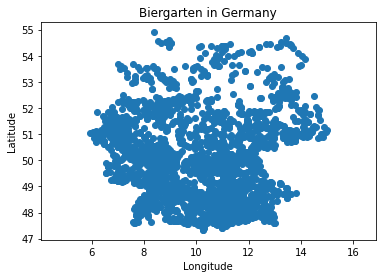

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [28]:
import overpy
api = overpy.Overpass()
r = api.query("""
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
""")
coords  = []
coords += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]
coords += [(float(way.center_lon), float(way.center_lat)) 
           for way in r.ways]
coords += [(float(rel.center_lon), float(rel.center_lat)) 
           for rel in r.relations]

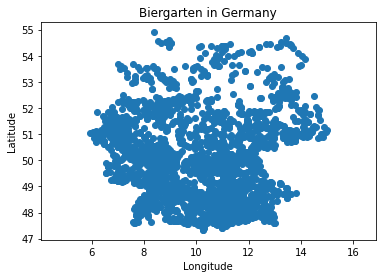

In [29]:
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()